In [1]:
import yfinance as yf
import pandas as pd
import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt

BancoSantanderSA = yf.Ticker("SAN")
print("El precio de compra es: ", BancoSantanderSA.info['ask']) #Precio de compra acción
print("El precio de venta es: ", BancoSantanderSA.info['bid']) #Precio de venta acción

Telefonica = yf.Ticker ("TEF")
print ("El precio de compra es: ",Telefonica.info['ask'])
print ("El precio de venta es: ",Telefonica. info['bid'])

Repsol = yf.Ticker ("REP.MC")
print ("El precio de compra es: ", Repsol.info['ask'])
print ("El precio de venta es: ",Repsol. info['bid'])

BancoBBVA = yf.Ticker ("BBVA")

print ("El precio de compra es: ", BancoBBVA.info['ask'])
print ("El precio de venta es: ", BancoBBVA. info['bid'])


El precio de compra es:  3.81
El precio de venta es:  3.8
El precio de compra es:  4.48
El precio de venta es:  4.42
El precio de compra es:  11.452
El precio de venta es:  11.444
El precio de compra es:  6.58
El precio de venta es:  6.37


In [2]:
dfSAN = yf.download('SAN', period="1d") #Obtengo datos de Yahoo para cada acción
dfSAN.reset_index(inplace=True,drop=False) #Me permite transformar a Date en columna al igual que las demas

dfTEF = yf.download('TEF',  period="1d")
dfTEF.reset_index(inplace=True,drop=False)

dfREPMC = yf.download('REP.MC', period="1d")
dfREPMC.reset_index(inplace=True,drop=False)

dfBBVA = yf.download('BBVA', period="1d")
dfBBVA.reset_index(inplace=True,drop=False)


print(dfSAN)
print(dfTEF)
print(dfREPMC)
print(dfBBVA)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date  Open  High   Low  Close  Adj Close   Volume
0 2021-10-27  3.81  3.85  3.78   3.79       3.79  3391898
        Date  Open   High   Low  Close  Adj Close   Volume
0 2021-10-27  4.44  4.455  4.42   4.42       4.42  6092231
        Date   Open   High    Low   Close  Adj Close   Volume
0 2021-10-27  11.58  11.58  11.32  11.466     11.466  8174144
        Date  Open    High   Low  Close  Adj Close  Volume
0 2021-10-27  6.51  6.5279  6.46   6.48       6.48  972773


In [3]:
varSAN = list(dfSAN.Open - dfSAN.Close) # Creo variables en donde almaceno una lista con la diferencia entre
varTEF = list(dfTEF.Open - dfTEF.Close) # los valores de la columna Open y Close
varREP = list(dfREPMC.Open - dfREPMC.Close)
varBBVA = list(dfBBVA.Open - dfBBVA.Close)
fecha = list(dfSAN.Date)

print(varSAN)
print(varTEF)
print(varREP)
print(varBBVA)
print(fecha)



[0.019999980926513672]
[0.019999980926513672]
[0.11400032043457031]
[0.03000020980834961]
[Timestamp('2021-10-27 00:00:00')]


In [4]:
data = {'Fecha': fecha,             #Creo un diccionario con las variables que cree asi despues formo el dataframe
    'Variacion Santander': varSAN,
    'Variacion Telefonica': varTEF,
    'Variacion Repsol': varREP,
    'Variacion BBVA': varBBVA,}


df = pd.DataFrame(data) #Creo el data frame tomando como parametro el diccionario anterior
print(df)

df.to_csv('Bolsayahoo.csv') #Creo el archivo CSV



       Fecha  Variacion Santander  Variacion Telefonica  Variacion Repsol  \
0 2021-10-27                 0.02                  0.02             0.114   

   Variacion BBVA  
0            0.03  


In [5]:
cabecera = np.array(df.columns[2:]) #obtengo la cebacera (listado de columnas), desde la primera accion de interes o sea la tercera columna 
print('Cabeceras: ', cabecera)
df = pd.read_csv('Bolsayahoo.csv')

Cabeceras:  ['Variacion Telefonica' 'Variacion Repsol' 'Variacion BBVA']


In [6]:
for i in df.index: #Saco los valores Maximos y Minimos correspondientes a cada dia
    acciones = np.array(df.iloc[i][2:])
    #print(acciones)
    vmax=acciones.max()
    vmin=acciones.min()
    accmax=cabecera[np.where(acciones==vmax)]
    accmin=cabecera[np.where(acciones==vmin)]
    print("En la fecha "+ str(df["Fecha"][i])+ " la mayor variacion fue ",round(vmax,2), "para ",accmax[0])
    print("En la fecha "+ str(df["Fecha"][i])+ " la menor variacion fue ",round(vmin,2), "para ",accmin[0])

En la fecha 2021-10-27 la mayor variacion fue  0.11 para  Variacion BBVA
En la fecha 2021-10-27 la menor variacion fue  0.02 para  Variacion Telefonica


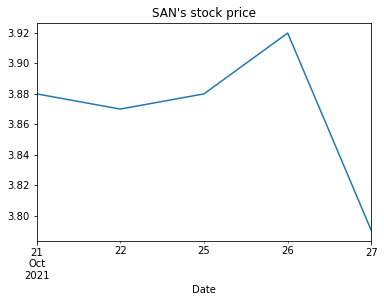

In [7]:
#Gráfico banco santander en los ultimos 5 días

ticker = yf.Ticker('SAN')
aapl_df = ticker.history(period="5d")
aapl_df['Close'].plot(title="SAN's stock price")
plt.savefig('SantanderYahoo.png')

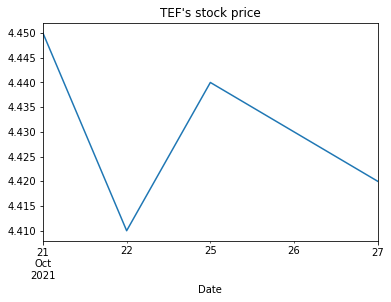

In [8]:
#GRÁFICO telefónica en los ultimos 5 días

ticker = yf.Ticker('TEF')
aapl_df = ticker.history(period="5d")
aapl_df['Close'].plot(title="TEF's stock price")
plt.savefig('TelefonicaYahoo.png')


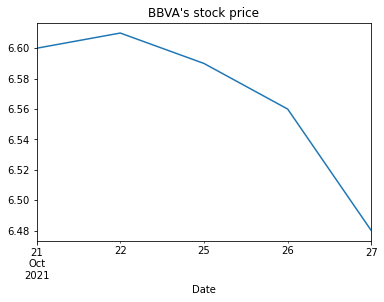

In [9]:
#GRÁFICO BANCO BBVA en los ultimos 5 días

ticker = yf.Ticker('BBVA')
aapl_df = ticker.history(period="5d")
aapl_df['Close'].plot(title="BBVA's stock price")
plt.savefig('BBVAYahoo.png')

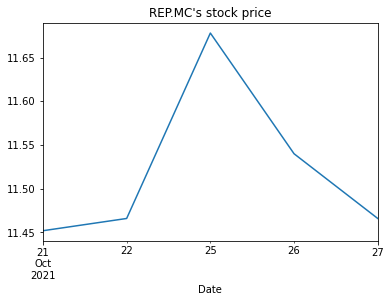

In [10]:
#GRÁFICO REPSOL en los ultimos 5 días

ticker = yf.Ticker('REP.MC')
aapl_df = ticker.history(period="5d")
aapl_df['Close'].plot(title="REP.MC's stock price")
plt.savefig('REPSOLYahoo.png')